## Model training - correlation based variable pool with RTMA data

### Set up/check environment

In [1]:
# check python environment
!conda info


     active environment : WM_ML
    active env location : /opt/anaconda3/envs/WM_ML
            shell level : 1
       user config file : /Users/jilliancheck/.condarc
 populated config files : /Users/jilliancheck/.condarc
          conda version : 24.11.3
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=m1
                          __conda=24.11.3=0
                          __osx=15.3.1=0
                          __unix=0=0
       base environment : /opt/anaconda3  (writable)
      conda av data dir : /opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/anaconda3/pkgs
   

In [2]:
import numpy as np
from numpy import mean, round
import pandas as pd
import pydot
import graphviz
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

# set the number of maximum displayed rows for printed dataframes to 1000
pd.set_option('display.max_rows', 15000)

In [3]:
x_train = pd.read_csv('')
y_train = pd.read_csv('')
x_test = pd.read_csv('')
y_test = pd.read_csv('')

# Check data sets and their lengths
print('x training data, n =', len(x_train))
print('y training data, n =', len(y_train))
print('x test data, n =', len(x_test))
print('y test data, n =', len(y_test))

x training data, n = 117
y training data, n = 117
x test data, n = 30
y test data, n = 30


In [4]:
# define cross validation scheme
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

## Alg 1: Binomial Logistic Regression

In [5]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Stepwise selection method and feature selection

In [6]:
# comparing selection methods (forwards vs backwards, floating vs not) and optimizing the number of features included

lr = linear_model.LogisticRegression(random_state=42)

# SFS
sfs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Selection:')
print(len(sfs.k_feature_idx_), 'features;', sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

# SBS
sbs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sbs = sbs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Selection:')
print(len(sbs.k_feature_idx_), 'features;', sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

# SFFS
sffs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sffs = sffs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Floating Selection:')
print(len(sffs.k_feature_idx_), 'features;', sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

# SBFS
sbfs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sbfs = sbfs.fit(x_train, y_train.values.ravel())

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Selection:
5 features; ('soil type', 'MA_MaxRH86', 'MA_SumATD', 'MA_SumRF_IBM', 'MA_MaxWS')
CV Score:
0.7166666666666667


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Backward Selection:
5 features; ('soil type', 'MA_MaxRH86', 'MA_SumATD', 'MA_SumRF_IBM', 'MA_MaxWS')
CV Score:
0.7166666666666667

Sequential Forward Floating Selection:
5 features; ('soil type', 'MA_MaxRH86', 'MA_SumATD', 'MA_SumRF_IBM', 'MA_MaxWS')
CV Score:
0.7166666666666667

Sequential Backward Floating Selection:
5 features; ('soil type', 'MA_MaxRH86', 'MA_SumATD', 'MA_SumRF_IBM', 'MA_MaxWS')
CV Score:
0.7166666666666667


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti

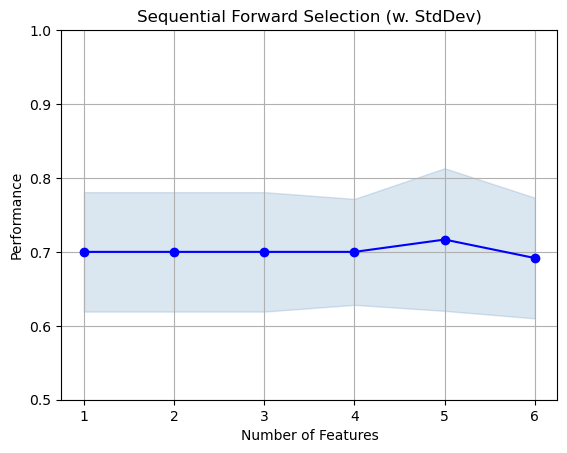

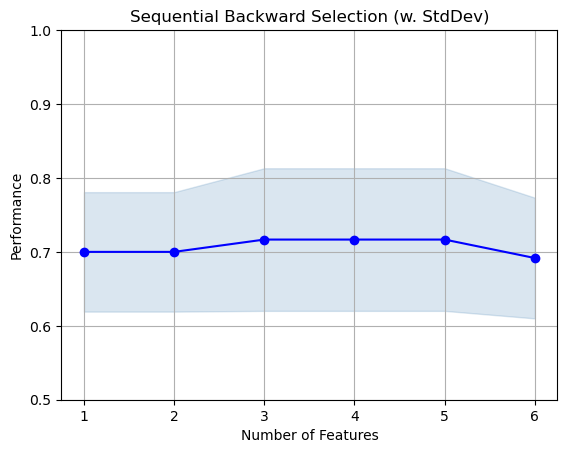

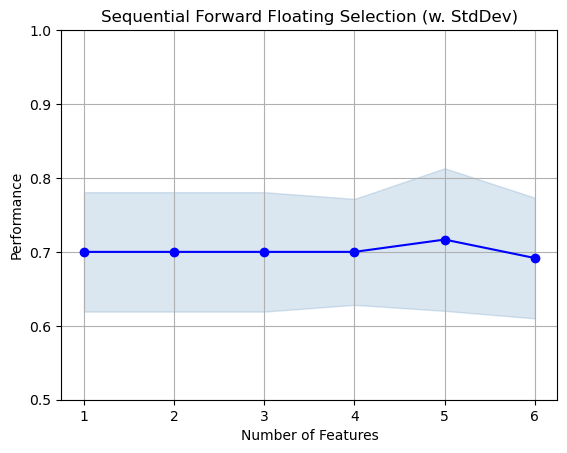

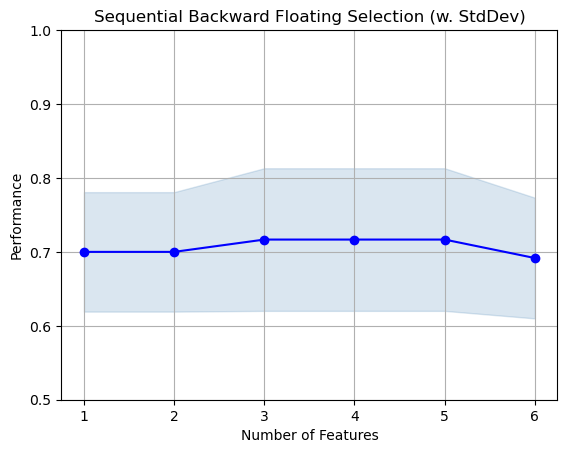

In [7]:
# plot results 

fig_sfs = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbs = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sffs = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbfs = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Backward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

In [8]:
# create a dataframe with only the selected features

selected_columns = list(map(str,sbs.k_feature_names_))
selected_columns = selected_columns[:3]
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

### Hyper parameter grid search

In [9]:
# define parent construction
lr = linear_model.LogisticRegression(random_state=42)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0, 5, 6)
   
# define parameter dictionary
param_dict = {
    'solver': solver,                   
    'penalty': penalty, 
    'C': C
}

In [10]:
# execute grid search
grid = GridSearchCV(estimator = lr,
                   param_grid = param_dict,
                    cv = cv,
                    verbose = 3
                   )
grid.fit(x_train_selected, y_train.values.ravel())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.583 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblin

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-pack

[CV 4/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 1/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.625 total time=   0.0s
[CV 2/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.625 total time=   0.0s
[CV 3/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 4/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 5/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 1/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.625 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.625 total time=   0.0s
[CV 3/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.708 total time=   0.0s
[CV 4/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-pack

[CV 3/5] END C=100000.0, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 4/5] END C=100000.0, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 5/5] END C=100000.0, penalty=l1, solver=liblinear;, score=0.708 total time=   0.0s
[CV 1/5] END ..C=100000.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ..C=100000.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ..C=100000.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ..C=100000.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ..C=100000.0, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100000.0, penalty=l1, solver=saga;, score=0.625 total time=   0.0s
[CV 2/5] END C=100000.0, penalty=l1, solver=saga;, score=0.625 total time=   0.0s
[CV 3/5] END C=100000.0, penalty=l1, solver=saga;, score=0.667 total time=   0.0s
[CV 4/5] END C=100000.0, penalty=l1, solver=saga;, score=0.792 total time=   0.0s
[CV 5/

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.7               nan 0.70833333        nan
 0.7        0.7        0.7        0.7        0.7        0.7
        nan        nan        nan        nan        nan        nan
        nan        nan 0.69166667        nan 0.7               nan
 0.69166667 0.7        0.74166667 0.7        0.70833333 0.69166667
        nan        nan        nan        nan        nan        nan
        nan        nan 0.68333333        nan 0.7               nan
 0.7        0.68333333 0.70833333 0.7        0.7        0.68333333
        nan        nan        nan        nan        nan        nan
        nan        nan 0.68333333        nan 0.7               nan
 0.68333333 0.68333333 0.68333333 0.69166667 0.7        0.68333333
        nan        nan        nan        nan        nan        nan
        nan        nan 0.68333333        nan 0.

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             verbose=3)

In [11]:
# organize grid search results for further exploration
lr_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(lr_grid_results) 

C     penalty           solver  Accuracy
26       10.0          l2        liblinear  0.741667
4         1.0          l1             saga  0.708333
44      100.0          l2        liblinear  0.708333
28       10.0          l2             saga  0.708333
2         1.0          l1        liblinear  0.700000
8         1.0          l2        liblinear  0.700000
100  100000.0          l2             saga  0.700000
82    10000.0          l2             saga  0.700000
76    10000.0          l1             saga  0.700000
64     1000.0          l2             saga  0.700000
94   100000.0          l1             saga  0.700000
58     1000.0          l1             saga  0.700000
46      100.0          l2             saga  0.700000
45      100.0          l2              sag  0.700000
40      100.0          l1             saga  0.700000
42      100.0          l2        newton-cg  0.700000
27       10.0          l2              sag  0.700000
6         1.0          l2        newton-cg  0.700000
7         1.0          l2            lbfgs  0.700000
25       10.0          l2            lbfgs  0.700000
9         1.0          l2              sag  0.700000
22       10.0          l1             saga  0.700000
10        1.0          l2             saga  0.700000
11        1.0          l2  newton-cholesky  0.700000
29       10.0          l2  newton-cholesky  0.691667
63     1000.0          l2              sag  0.691667
81    10000.0          l2              sag  0.691667
20       10.0          l1        liblinear  0.691667
24       10.0          l2        newton-cg  0.691667
99   100000.0          l2              sag  0.691667
96   100000.0          l2        newton-cg  0.683333
98   100000.0          l2        liblinear  0.683333
92   100000.0          l1        liblinear  0.683333
83    10000.0          l2  newton-cholesky  0.683333
80    10000.0          l2        liblinear  0.683333
97   100000.0          l2            lbfgs  0.683333
56     1000.0          l1        liblinear  0.683333
79    10000.0          l2            lbfgs  0.683333
78    10000.0          l2        newton-cg  0.683333
74    10000.0          l1        liblinear  0.683333
65     1000.0          l2  newton-cholesky  0.683333
62     1000.0          l2        liblinear  0.683333
61     1000.0          l2            lbfgs  0.683333
60     1000.0          l2        newton-cg  0.683333
47      100.0          l2  newton-cholesky  0.683333
43      100.0          l2            lbfgs  0.683333
38      100.0          l1        liblinear  0.683333
101  100000.0          l2  newton-cholesky  0.683333
0         1.0          l1        newton-cg       NaN
1         1.0          l1            lbfgs       NaN
3         1.0          l1              sag       NaN
5         1.0          l1  newton-cholesky       NaN
12        1.0  elasticnet        newton-cg       NaN
13        1.0  elasticnet            lbfgs       NaN
14        1.0  elasticnet        liblinear       NaN
15        1.0  elasticnet              sag       NaN
16        1.0  elasticnet             saga       NaN
17        1.0  elasticnet  newton-cholesky       NaN
18       10.0          l1        newton-cg       NaN
19       10.0          l1            lbfgs       NaN
21       10.0          l1              sag       NaN
23       10.0          l1  newton-cholesky       NaN
30       10.0  elasticnet        newton-cg       NaN
31       10.0  elasticnet            lbfgs       NaN
32       10.0  elasticnet        liblinear       NaN
33       10.0  elasticnet              sag       NaN
34       10.0  elasticnet             saga       NaN
35       10.0  elasticnet  newton-cholesky       NaN
36      100.0          l1        newton-cg       NaN
37      100.0          l1            lbfgs       NaN
39      100.0          l1              sag       NaN
41      100.0          l1  newton-cholesky       NaN
48      100.0  elasticnet        newton-cg       NaN
49      100.0  elasticnet            lbfgs       NaN
50      100.0  elasticnet        libl

### Hyper parameter and model setting

In [12]:
# indexing best parameters from GridSearchCV
hyper_lr = grid.best_params_

# print best hyperparamaters
print(hyper_lr)

# tune decision tree model using best hyper parameters
lr_tuned = linear_model.LogisticRegression(random_state = 42,
                                           max_iter=10000,
                                           solver = hyper_lr['solver'],
                                           penalty = hyper_lr['penalty'],
                                           C = hyper_lr['C'])

{'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}


### Performance estimation for training data

In [13]:
# evaluate the tuned model
lr_tuned_score = cross_val_score(lr_tuned,
                                 x_train_selected,
                                 y_train.values.ravel(),
                                 cv=cv)

print('Accuracy scores:', np.round(lr_tuned_score, 2))
print('Average accuracy on training data:', lr_tuned_score.mean())

Accuracy scores: [0.62 0.67 0.75 0.79 0.88]
Average accuracy on training data: 0.7416666666666666


### Evaluate model with test data

In [14]:
# Fit a logistic regression model using the selected features
ypred = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict(x_test_selected)
yprob = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict_proba(x_test_selected)

# assessing accuracy of tuned model on test data
lr_tuned_score = lr_tuned.score(x_test_selected, y_test.values.ravel())

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round(mean(lr_tuned_score), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.69
Tuned model accuracy on testing data: 0.67
Sensitivity 0.64
Specficity 0.68
Precision 0.54


### Print coefficients

In [15]:
list1 = x_train_selected.columns.tolist()
list2 = lr_tuned.coef_.ravel().tolist()

coefs = pd.DataFrame({'feature': list1, 'coefficient': list2})

display(coefs)

feature  coefficient
0   soil type    -0.678112
1  MA_MaxRH86     5.296000
2   MA_SumATD     2.030267

## Alg 2: Decision Tree

In [16]:
# packages import
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from numpy import mean

### Hyper parameter grid search

In [17]:
# define parent construction
dt = DecisionTreeClassifier(random_state=42)

criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best']
max_depth = range(7,13)
min_samples_split = range(3,10)
min_samples_leaf = range(3,6)
    
# define parameter dictionary
param_dict = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,
}

# parameters not included in GridSearchCV:
    # min_weight_fraction: minimum weighted fraction of the sum total of weights (of all the input samples) required
        # to be a leaf node. Samples have equal weight when sample_weight is not provided.
    # max_features: the number of features to consider when looking for the best split (default = None)
    # max_leaf_nodes: grow a tree with max leaf nodes in best-first fashion. If none, then unlimited number of leaf nodes
    # min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal
        # to this value (default = 0.0)
    # class weight: weights associated with class lables. If none, all classes are supposed to have weight one
    # ccp alpha: complexity parameter used for minimal cost-complexity pruning

In [18]:
# execute grid search
grid = GridSearchCV(estimator = dt,
                    param_grid = param_dict,
                    cv = cv,
                    verbose = 3
                   )
grid.fit(x_train, y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.667 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.625 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.625 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.667 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=gin

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(7, 13),
                         'min_samples_leaf': range(3, 6),
                         'min_samples_split': range(3, 10),
                         'splitter': ['best']},
             verbose=3)

In [19]:
# organize grid search results for further exploration
dt_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(dt_grid_results)

criterion  max_depth  min_samples_leaf  min_samples_split splitter  \
377  log_loss         12                 5                  9     best   
335  log_loss         10                 5                  9     best   
312  log_loss          9                 5                  7     best   
313  log_loss          9                 5                  8     best   
314  log_loss          9                 5                  9     best   
205   entropy         10                 5                  5     best   
206   entropy         10                 5                  6     best   
207   entropy         10                 5                  7     best   
251   entropy         12                 5                  9     best   
250   entropy         12                 5                  8     best   
249   entropy         12                 5                  7     best   
248   entropy         12                 5                  6     best   
247   entropy         12                 5                  5     best   
246   entropy         12                 5                  4     best   
245   entropy         12                 5                  3     best   
329  log_loss         10                 5                  3     best   
330  log_loss         10                 5                  4     best   
332  log_loss         10                 5                  6     best   
333  log_loss         10                 5                  7     best   
311  log_loss          9                 5                  6     best   
310  log_loss          9                 5                  5     best   
309  log_loss          9                 5                  4     best   
293  log_loss          8                 5                  9     best   
163   entropy          8                 5                  5     best   
287  log_loss          8                 5                  3     best   
288  log_loss          8                 5                  4     best   
289  log_loss          8                 5                  5     best   
290  log_loss          8                 5                  6     best   
291  log_loss          8                 5                  7     best   
292  log_loss          8                 5                  8     best   
164   entropy          8                 5                  6     best   
308  log_loss          9                 5                  3     best   
165   entropy          8                 5                  7     best   
166   entropy          8                 5                  8     best   
167   entropy          8                 5                  9     best   
204   entropy         10                 5                  4     best   
203   entropy         10                 5                  3     best   
162   entropy          8                 5                  4     best   
161   entropy          8                 5                  3     best   
334  log_loss         10                 5                  8     best   
331  log_loss         10                 5                  5     best   
208   entropy         10                 5                  8     best   
354  log_loss         11                 5                  7     best   
356  log_loss         11                 5                  9     best   
186   entropy          9                 5                  7     best   
187   entropy          9                 5                  8     best   
188   entropy          9                 5                  9     best   
230   entropy         11                 5                  9     best   
229   entropy         11                 5                  8     best   
228   entropy         11                 5                  7     best   
227   entropy         11                 5                  6     best   
226   entropy         11                 5                  5     best   
225   entropy         11                 5                  4     best   
224   en

### Hyper parameter and model setting

In [20]:
# indexing best parameters from GridSearchCV
hyper_dt = grid.best_params_

# print best hyperparamaters
print(hyper_dt)

# tune decision tree model using best hyper parameters
dt_tuned = DecisionTreeClassifier(random_state=42,
                                  criterion = hyper_dt['criterion'],
                                  splitter = hyper_dt['splitter'],
                                  max_depth = hyper_dt['max_depth'],
                                  min_samples_leaf= hyper_dt['min_samples_leaf'],
                                 min_samples_split = hyper_dt['min_samples_split']
                                 )

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}


### Performance estimation for training data

In [21]:
# evaluate the tuned model
dt_tuned_train_result = cross_val_score(dt_tuned,
                                        x_train,
                                        y_train,
                                        cv=cv)

print('Accuracy scores:', np.round(dt_tuned_train_result, 2))
print('Average accuracy on training data:', dt_tuned_train_result.mean())

Accuracy scores: [0.79 0.62 0.79 0.83 0.54]
Average accuracy on training data: 0.7166666666666666


### Evaluate model with test data

In [22]:
# using tuned model to make y test data preditions using x test data inputs
ypred = dt_tuned.fit(x_train, y_train).predict(x_test)
yprob = dt_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.75
Tuned model accuracy on testing data: 0.77
Sensitivity 0.69
Specficity 0.86
Precision 0.85


### Extract feature importance

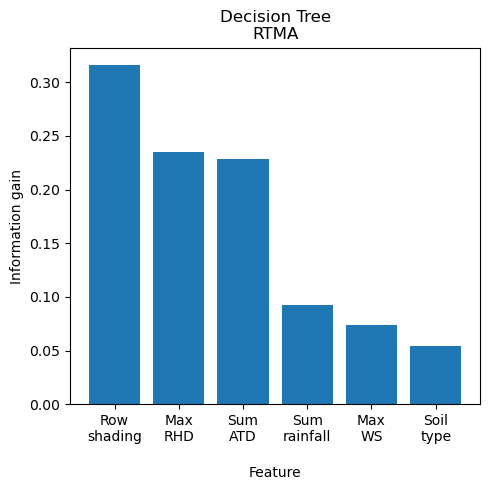

In [25]:
importances = dt_tuned.feature_importances_
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(5, 5))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Information gain')
plt.title('Decision Tree\nRTMA')
plt.tight_layout()
plt.savefig("DT - corr - RTMA - FI.png", dpi = 1200)
plt.show()

## Alg 3: Random Forest

In [17]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Hyper parameter grid search

In [18]:
# define parent construction
rf = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start=20, stop=30, num=10)]
criterion = ['entropy', 'log_loss', 'gini']
max_depth = range(7, 11)
min_samples_split = range(5,10)
min_samples_leaf = range(3,5)
bootstrap = [True]
ccp_alpha = (0, 0.001, 0.01)

# define parameter dictionary
param_dict = {'n_estimators': n_estimators,
              'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'ccp_alpha': ccp_alpha
             }   

### Hyper parameter and model setting

In [19]:
grid = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    cv=cv,
                    verbose=3)
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.625 total time=   0.0s
[CV 3/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 4/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 5/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.750 total time=   0.0s
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=21;, score=0.750 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, m

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': (0, 0.001, 0.01),
                         'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': range(7, 11),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(5, 10),
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          30]},
             verbose=3)

[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.977 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.909 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.920 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.909 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.920 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.989 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=35;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.909 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.977 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.920 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=30;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.920 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.966 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.898 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.920 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.920 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.966 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.898 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.920 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=30;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=0.898 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.909 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.920 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=30;,

[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.886 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.909 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.886 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=25;, score=0.977 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=30;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25;, score=0.909 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25;, score=0.886 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=25;, score=0.977 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.898 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=30;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.898 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.943 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=25;, score=0.966 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.875 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.898 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=30;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.977 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=0.966 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.955 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.932 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;,

[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=0.977 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=0.966 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.955 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=30;,

[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=20;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.955 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.977 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=25;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.966 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.989 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=25;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.909 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.932 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.966 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20;, score=0.989 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=25;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.943 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=1.000 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.898 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=20;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=0.943 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=40;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.920 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=20;, score=0.932 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=20;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.932 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.955 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.966 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=0.943 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=40;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=20;,

[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=35;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=35;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=35;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=40;,

[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=40;, score=0.977 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=40;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.989 total time=   0.1s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=40;,

[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.989 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;, score=0.977 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;, score=0.932 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=35;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=35;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=35;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=35;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=35;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=35;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=35;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=35;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=35;,

[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;, score=0.955 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.966 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.966 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;, score=0.943 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=35;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.989 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;, score=0.977 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;, score=0.955 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=35;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.943 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=35;,

[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.943 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.966 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=30;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=35;,

[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.943 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.966 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.977 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;, score=0.989 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=30;,

[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=0.977 total time=   0.0s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=25;, score=1.000 total time=   0.0s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.932 total time=   0.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.977 total time=   0.0s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.955 total time=   0.0s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;,

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.955 total time=   0.1s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=0.977 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=25;, score=1.000 total time=   0.1s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.932 total time=   0.2s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;, score=0.977 total time=   0.1s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=30;,

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 10),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [20, 25, 30, 35, 40]},
             verbose=3)

In [20]:
# organize grid search results for further exploration
rf_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(rf_grid_results)

ccp_alpha criterion  max_depth  min_samples_leaf  min_samples_split  \
1972      0.001  log_loss         10                 4                  7   
2882      0.010  log_loss          7                 4                  8   
2862      0.010  log_loss          7                 4                  6   
2866      0.010  log_loss          7                 4                  6   
1682      0.001  log_loss          7                 4                  8   
2872      0.010  log_loss          7                 4                  7   
2876      0.010  log_loss          7                 4                  7   
2466      0.010   entropy          7                 4                  6   
552       0.000  log_loss          8                 4                  5   
2886      0.010  log_loss          7                 4                  8   
2856      0.010  log_loss          7                 4                  5   
2452      0.010   entropy          7                 4                  5   
2952      0.010  log_loss          8                 4                  5   
2956      0.010  log_loss          8                 4                  5   
562       0.000  log_loss          8                 4                  6   
2962      0.010  log_loss          8                 4                  6   
2966      0.010  log_loss          8                 4                  6   
2972      0.010  log_loss          8                 4                  7   
3172      0.010  log_loss         10                 4                  7   
2852      0.010  log_loss          7                 4                  5   
2982      0.010  log_loss          8                 4                  8   
2782      0.010   entropy         10                 4                  8   
482       0.000  log_loss          7                 4                  8   
82        0.000   entropy          7                 4                  8   
2666      0.010   entropy          9                 4                  6   
2772      0.010   entropy         10                 4                  7   
2662      0.010   entropy          9                 4                  6   
2776      0.010   entropy         10                 4                  7   
2582      0.010   entropy          8                 4                  8   
2786      0.010   entropy         10                 4                  8   
1672      0.001  log_loss          7                 4                  7   
2656      0.010   entropy          9                 4                  5   
2652      0.010   entropy          9                 4                  5   
3186      0.010  log_loss         10                 4                  8   
3182      0.010  log_loss         10                 4                  8   
1662      0.001  log_loss          7                 4                  6   
1882      0.001  log_loss          9                 4                  8   
3176      0.010  log_loss         10                 4                  7   
2976      0.010  log_loss          8                 4                  7   
2986      0.010  log_loss          8                 4                  8   
2766      0.010   entropy         10                 4                  6   
762       0.000  log_loss         10                 4                  6   
3162      0.010  log_loss         10                 4                  6   
782       0.000  log_loss         10                 4                  8   
3156      0.010  log_loss         10                 4                  5   
1862      0.001  log_loss          9                 4                  6   
772       0.000  log_loss         10                 4                  7   
3152      0.010  log_loss         10                 4                  5   
172       0.000   entropy          8                 4                  7   
2462      0.010   entropy          7                 4                  6   
162       0.000   entropy          8                 4                  6   
75

In [21]:
# indexing best parameters from GridSearchCV
hyper_rf = grid.best_params_

# print best hyperparamaters
print(hyper_rf)

# tune decision tree model using best hyper parameters
rf_tuned = RandomForestClassifier(random_state=42,
    n_estimators = hyper_rf["n_estimators"],
    min_samples_split = hyper_rf["min_samples_split"],
    min_samples_leaf = hyper_rf["min_samples_leaf"],
    max_depth = hyper_rf["max_depth"]
                                 )

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 22}


### Performance estimation for training data

In [22]:
# evaluate the tuned model
rf_tuned_train_result = cross_val_score(rf_tuned,
                                        x_train,
                                        y_train.values.ravel(),
                                        cv=cv)

print('Accuracy scores:', np.round(rf_tuned_train_result, 2))
print('Average accuracy on training data:', rf_tuned_train_result.mean())

Accuracy scores: [0.71 0.62 0.71 0.79 0.79]
Average accuracy on training data: 0.725


### Evaluate model with test data

In [23]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = rf_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = rf_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.8
Tuned model accuracy on testing data: 0.73
Sensitivity 0.69
Specficity 0.76
Precision 0.69


## Alg 4: Support Vector Machine

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Hyperparameter grid search

In [32]:
# define the parent construction
svm = SVC(random_state=42)

C = [0.1, 1, 10]
kernel = ['linear', 'rbf', 'poly']
gamma = ['scale', 'auto']
degree = [1, 2, 3, 4, 5]
decision_function_shape = ['ovo', 'ovr']

# define parameter dictionary
param_dict = {
    'C': C,
    'kernel': kernel,
    'gamma': gamma,
    'degree': degree,
    'decision_function_shape': decision_function_shape
}

In [33]:
# execute grid search
grid = GridSearchCV(estimator = svm,
                    param_grid = param_dict,
                    cv = cv, 
                    verbose = 3
                   )

grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.583 total time=   0.0s
[CV 2/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.583 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.583 total time=   0.0s
[CV 4/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.583 total time=   0.0s
[CV 5/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=linear;, score=0.583 total time=   0.0s
[CV 1/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.583 total time=   0.0s
[CV 2/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.1, decision_function_shape=ovo, degree=1, gamma=scale, kernel=rbf;, score=0.708 total time=  

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [34]:
# organize grid search results for further exploration
svm_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(svm_grid_results)

C decision_function_shape  degree  gamma  kernel  Accuracy
110   1.0                     ovr       4  scale    poly  0.758333
164  10.0                     ovr       3  scale    poly  0.758333
134  10.0                     ovo       3  scale    poly  0.758333
80    1.0                     ovo       4  scale    poly  0.758333
26    0.1                     ovo       5  scale    poly  0.750000
56    0.1                     ovr       5  scale    poly  0.750000
104   1.0                     ovr       3  scale    poly  0.733333
74    1.0                     ovo       3  scale    poly  0.733333
94    1.0                     ovr       1   auto     rbf  0.725000
70    1.0                     ovo       2   auto     rbf  0.725000
158  10.0                     ovr       2  scale    poly  0.725000
106   1.0                     ovr       3   auto     rbf  0.725000
76    1.0                     ovo       3   auto     rbf  0.725000
64    1.0                     ovo       1   auto     rbf  0.725000
112   1.0                     ovr       4   auto     rbf  0.725000
14    0.1                     ovo       3  scale    poly  0.725000
68    1.0                     ovo       2  scale    poly  0.725000
82    1.0                     ovo       4   auto     rbf  0.725000
118   1.0                     ovr       5   auto     rbf  0.725000
100   1.0                     ovr       2   auto     rbf  0.725000
44    0.1                     ovr       3  scale    poly  0.725000
98    1.0                     ovr       2  scale    poly  0.725000
88    1.0                     ovo       5   auto     rbf  0.725000
128  10.0                     ovo       2  scale    poly  0.725000
151  10.0                     ovr       1  scale     rbf  0.716667
157  10.0                     ovr       2  scale     rbf  0.716667
121  10.0                     ovo       1  scale     rbf  0.716667
127  10.0                     ovo       2  scale     rbf  0.716667
145  10.0                     ovo       5  scale     rbf  0.716667
163  10.0                     ovr       3  scale     rbf  0.716667
139  10.0                     ovo       4  scale     rbf  0.716667
169  10.0                     ovr       4  scale     rbf  0.716667
175  10.0                     ovr       5  scale     rbf  0.716667
133  10.0                     ovo       3  scale     rbf  0.716667
71    1.0                     ovo       2   auto    poly  0.716667
101   1.0                     ovr       2   auto    poly  0.716667
20    0.1                     ovo       4  scale    poly  0.716667
50    0.1                     ovr       4  scale    poly  0.716667
77    1.0                     ovo       3   auto    poly  0.708333
113   1.0                     ovr       4   auto    poly  0.708333
107   1.0                     ovr       3   auto    poly  0.708333
83    1.0                     ovo       4   auto    poly  0.708333
119   1.0                     ovr       5   auto    poly  0.700000
89    1.0                     ovo       5   auto    poly  0.700000
176  10.0                     ovr       5  scale    poly  0.700000
146  10.0                     ovo       5  scale    poly  0.700000
141  10.0                     ovo       4   auto  linear  0.691667
144  10.0                     ovo       5  scale  linear  0.691667
138  10.0                     ovo       4  scale  linear  0.691667
147  10.0                     ovo       5   auto  linear  0.691667
123  10.0                     ovo       1   auto  linear  0.691667
177  10.0                     ovr       5   auto  linear  0.691667
135  10.0                     ovo       3   auto  linear  0.691667
174  10.0                     ovr       5  scale  linear  0.691667
171  10.0                     ovr       4   auto  linear  0.691667
132  10.0                     ovo       3  scale  linear  0.691667
168  10.0                     ovr       4  scale  linear  0.691667
165  10.0                     ovr       3   auto  linear  0.691667
129  10.0                     ovo       2   auto  linea

### Hyperparameter and model setting

In [35]:
# indexing best parameters from GridSearchCV
hyper_params = grid.best_params_

# print best hyperparamaters
print("Best Hyperparameters:", hyper_params)

# tune model using best hyper parameters
svm_tuned = SVC(random_state=42,
                C = hyper_params['C'],
                kernel = hyper_params['kernel'],
                gamma = hyper_params['gamma'],
                degree = hyper_params['degree'],
               probability = True)

Best Hyperparameters: {'C': 1, 'decision_function_shape': 'ovo', 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


### Performance estimation for training data

In [36]:
# evaluate the tuned model
svm_tuned_train_result = cross_val_score(svm_tuned,
                                     x_train,
                                     y_train.values.ravel(),
                                     cv=cv)

print('Accuracy scores:', np.round(svm_tuned_train_result, 2))
print('Average accuracy on training data:', svm_tuned_train_result.mean())

Accuracy scores: [0.62 0.71 0.79 0.79 0.88]
Average accuracy on training data: 0.7583333333333333


### Evaluate model with test data

In [37]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = svm_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = svm_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.81
Tuned model accuracy on testing data: 0.7
Sensitivity 0.62
Specficity 0.79
Precision 0.77


In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

y_train = np.ravel(y_train) # target data must be a 1-D array, not a single column vector

### Hyper parameter grid search

In [ ]:
# define the parent construction
mlp = MLPClassifier(max_iter=10000, random_state=42)

# definition
hidden_layer_sizes = [10, 15, 20, 30]
# definition
activation = ['logistic', 'tanh', 'relu']
# definition
alpha = [0.0001, 0.001, 0.01]
         
# define parameter dictionary
param_dict = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'alpha': alpha
}

# parameters not included in GridSearchCV:
    # ...

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = mlp, 
                           param_grid = param_dict, 
                           cv=cv, 
                           verbose = 3)
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
mlp_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(mlp_grid_results)

### Hyper parameter and model setting 

In [ ]:
# indexing best parameters from GridSearchCV
hyper_mlp = grid.best_params_

# print best hyperparamaters
print(hyper_mlp)

# tune decision tree model using best hyper parameters
mlp_tuned = MLPClassifier(random_state=42,
                          hidden_layer_sizes = hyper_mlp['hidden_layer_sizes'],
                                 activation = hyper_mlp['activation'],
                                 alpha = hyper_mlp['alpha'])

### Performance estimation for training data

In [ ]:
# evaluate the tuned model
tuned_model_result = cross_val_score(mlp_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Tuned model accuracy on training data:', tuned_model_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = mlp_tuned.fit(x_train, y_train).predict(x_test)

# assessing accuracy of tuned model on test data
mlp_tuned_score = mlp_tuned.score(x_test, y_test)

# print results
print('Tuned model accuracy on testing data:', mlp_tuned_score)
print('Confusion matrix\n', confusion_matrix(y_test, ypred))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# data renaming to match tpot export syntax
training_features = x_train
testing_features = x_test
training_target = y_train
testing_target = y_test

# Average CV score on the training set was: 0.8110507246376812
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    MaxAbsScaler(),
    PCA(iterated_power=7, svd_solver="randomized"),
    StackingEstimator(estimator=MLPClassifier(alpha=0.0001, learning_rate_init=0.1)),
    MaxAbsScaler(),
    Normalizer(norm="l1"),
    PCA(iterated_power=5, svd_solver="randomized"),
    SGDClassifier(alpha=0.01, eta0=0.1, fit_intercept=False, l1_ratio=0.5, learning_rate="invscaling", loss="squared_hinge", penalty="elasticnet", power_t=0.0)
)

# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

testing_target = LabelEncoder().fit_transform(testing_target.astype('str'))
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

# quantify accuracy on test data
results = results.astype(int)
testing_target = testing_target.astype(int)

n = len(results)
score = sum(results == testing_target)/n
print('accuracy =', score)

## Pickle trained and tuned models

In [ ]:
import pickle

In [ ]:
# Pickle models

pickle.dump(lr_tuned, open('Models/LR_corr_RTMA.pkl','wb'))
pickle.dump(dt_tuned, open('Models/DT_corr_RTMA.pkl','wb'))
pickle.dump(rf_tuned, open('Models/RF_corr_RTMA.pkl','wb'))
pickle.dump(svm_tuned, open('Models/SVM_corr_RTMA.pkl','wb'))